In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [85]:
raw_data = pd.read_excel('/Users/mylesjauncey/Documents/GitHub/The-Holy-Churnity-Father-Son-and-Departed-User-/1 - Project Data.xlsx')

In [7]:
raw_data.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [9]:
raw_data.shape

(7043, 31)

In [12]:
raw_data.dtypes

CustomerID            object
Count                  int64
Country               object
State                 object
City                  object
Zip Code               int64
Lat Long              object
Latitude             float64
Longitude            float64
Gender                object
Senior Citizen        object
Partner               object
Dependents            object
Tenure Months          int64
Phone Service         object
Multiple Lines        object
Internet Service      object
Online Security       object
Online Backup         object
Device Protection     object
Tech Support          object
Streaming TV          object
Streaming Movies      object
Contract              object
Paperless Billing     object
Payment Method        object
Monthly Charges      float64
Total Charges         object
Churn Label           object
Churn Value            int64
Churn Reason          object
dtype: object

In [24]:
for col in raw_data.columns:
    print(f'Columnm: {col}\n')
    print(f'{raw_data[col].unique()}\n\n')

Columnm: CustomerID

['3668-QPYBK' '9237-HQITU' '9305-CDSKC' ... '2234-XADUH' '4801-JZAZL'
 '3186-AJIEK']


Columnm: Count

[1]


Columnm: Country

['United States']


Columnm: State

['California']


Columnm: City

['Los Angeles' 'Beverly Hills' 'Huntington Park' ... 'Standish' 'Tulelake'
 'Olympic Valley']


Columnm: Zip Code

[90003 90005 90006 ... 96128 96134 96146]


Columnm: Lat Long

['33.964131, -118.272783' '34.059281, -118.30742' '34.048013, -118.293953'
 ... '40.346634, -120.386422' '41.813521, -121.492666'
 '39.191797, -120.212401']


Columnm: Latitude

[33.964131 34.059281 34.048013 ... 40.346634 41.813521 39.191797]


Columnm: Longitude

[-118.272783 -118.30742  -118.293953 ... -120.386422 -121.492666
 -120.212401]


Columnm: Gender

['Male' 'Female']


Columnm: Senior Citizen

['No' 'Yes']


Columnm: Partner

['No' 'Yes']


Columnm: Dependents

['No' 'Yes']


Columnm: Tenure Months

[ 2  8 28 49 10  1 47 17  5 34 11 15 18  9  7 12 25 68 55 37  3 27 20  4
 58 53 13  6 19 

Customer_ID - String

Country - String/Category

State - String/Category

City - String/Category

Lat/Long - might not be needed (Check if data matches lat and long columns)

Gender - String/Category

Senior Citizen - Bool

Partner - Bool

Dependants - Bool

Phone Service - Bool

Multiple Lines - Category

Internet Service - Category

Online Security - Category

Online Backup - Category

Device Protection - Category

Tech Support - Category

Streaming TV - Category

Contract - Category

Paper Less Billing - Category

Payment Method - Category

Total Charges - Float

Churn Label - Bool (similar to churn val)

Churn Value - Bool (^^)

Churn Reason - Category

In [51]:
(raw_data == ' ').sum()

CustomerID            0
Count                 0
Country               0
State                 0
City                  0
Zip Code              0
Lat Long              0
Latitude              0
Longitude             0
Gender                0
Senior Citizen        0
Partner               0
Dependents            0
Tenure Months         0
Phone Service         0
Multiple Lines        0
Internet Service      0
Online Security       0
Online Backup         0
Device Protection     0
Tech Support          0
Streaming TV          0
Streaming Movies      0
Contract              0
Paperless Billing     0
Payment Method        0
Monthly Charges       0
Total Charges        11
Churn Label           0
Churn Value           0
Churn Reason          0
dtype: int64

No NaN's, No Empty Strings, 11 Space cells in total_charges

In [53]:
def TotalChargesEst(df):
    df['total_charges'] = pd.to_numeric(df['total_charges'].replace(' ', np.nan), errors='coerce')

    changed_indices = df[df['total_charges'].isna()].index

    calculated_total = df['monthly_charges']*df['tenure_months']
    df['total_charges'] = df['total_charges'].fillna(calculated_total)

    return df, changed_indices

In [109]:
def BoolMapping(df, cols):
    for col in cols:
        if col in ['senior_citizen', 'partner', 'dependents', 'phone_service', 'paper_billing']:
            df[col] = df[col].map({'Yes': 1, 'No': 0})
        if col == 'gender':
            df['is_male'] = df[col].map({'Male': 1, 'Female': 0})
            df.drop(columns = 'gender', inplace=True)
            cols = ['is_male' if c == 'gender' else c for c in cols]
    return df, cols

In [114]:
def Cleaning(rawdf, catcol, boolcol, stringcol, floatcol,
             dropcol):
    df = rawdf.copy()

    #Change Column Names
    df.columns = df.columns.str.strip().str.replace(' ',  '_').str.lower()

    #FillMissingData Section
    df, est_indicies = TotalChargesEst(df)
    df['churn_reason'].fillna('No Reason', inplace=True)

    #ChangeType Section

    df[catcol] = df[catcol].astype('category')
    #Bools
    df, boolcol_altered = BoolMapping(df, cols = boolcol)
    df[boolcol_altered] = df[boolcol_altered].astype('bool')
    df[stringcol] = df[stringcol].astype('string')
    df[floatcol] = df[floatcol].astype('float')

    #DropColumns
    df.drop(columns=dropcol, inplace=True)

    dfnumeric = df.copy()

    dfnumeric[boolcol_altered] = df[boolcol_altered].astype('int')

    return df, dfnumeric

In [115]:
CatCol = ['city', 'multiple_lines', 'internet_service', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'contract', 'paperless_billing', 'payment_method', 'churn_reason']
BoolCol = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 'churn_value']
StringCol = ['customerid']
FloatCol = ['total_charges']
DropCol = ['country', 'count', 'churn_label', 'lat_long', 'state']

#phone service and multiple lines same information

cleandf, cleannumericdf = Cleaning(raw_data, catcol=CatCol, boolcol=BoolCol, stringcol=StringCol, floatcol=FloatCol, dropcol=DropCol)

/var/folders/ck/j26tby551231jzzyzr1y09mr0000gn/T/ipykernel_79238/171295984.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['total_charges'] = pd.to_numeric(df['total_charges'].replace(' ', np.nan), errors='coerce')
/var/folders/ck/j26tby551231jzzyzr1y09mr0000gn/T/ipykernel_79238/2833289963.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform

In [116]:
cleannumericdf

,customerid,city,zip_code,latitude,longitude,senior_citizen,partner,dependents,tenure_months,phone_service,...,streaming_tv,streaming_movies,contract,paperless_billing,payment_method,monthly_charges,total_charges,churn_value,churn_reason,is_male
0,3668-QPYBK,Los Angeles,90003,33.964131,-118.272783,0,0,0,2,1,...,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,Competitor made better offer,1
1,9237-HQITU,Los Angeles,90005,34.059281,-118.307420,0,0,1,2,1,...,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,Moved,0
2,9305-CDSKC,Los Angeles,90006,34.048013,-118.293953,0,0,1,8,1,...,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.50,1,Moved,0
3,7892-POOKP,Los Angeles,90010,34.062125,-118.315709,0,1,1,28,1,...,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,1,Moved,0
4,0280-XJGEX,Los Angeles,90015,34.039224,-118.266293,0,0,1,49,1,...,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.30,1,Competitor had better devices,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,2569-WGERO,Landers,92285,34.341737,-116.539416,0,0,0,72,1,...,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.40,0,No Reason,0
7039,6840-RESVB,Adelanto,92301,34.667815,-117.536183,0,1,1,24,1,...,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,0,No Reason,1
7040,2234-XADUH,Amboy,92304,34.559882,-115.637164,0,1,1,72,1,...,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,0,No Reason,0
7041,4801-JZAZL,Angelus Oaks,92305,34.167800,-116.864330,0,1,1,11,0,...,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,0,No Reason,0


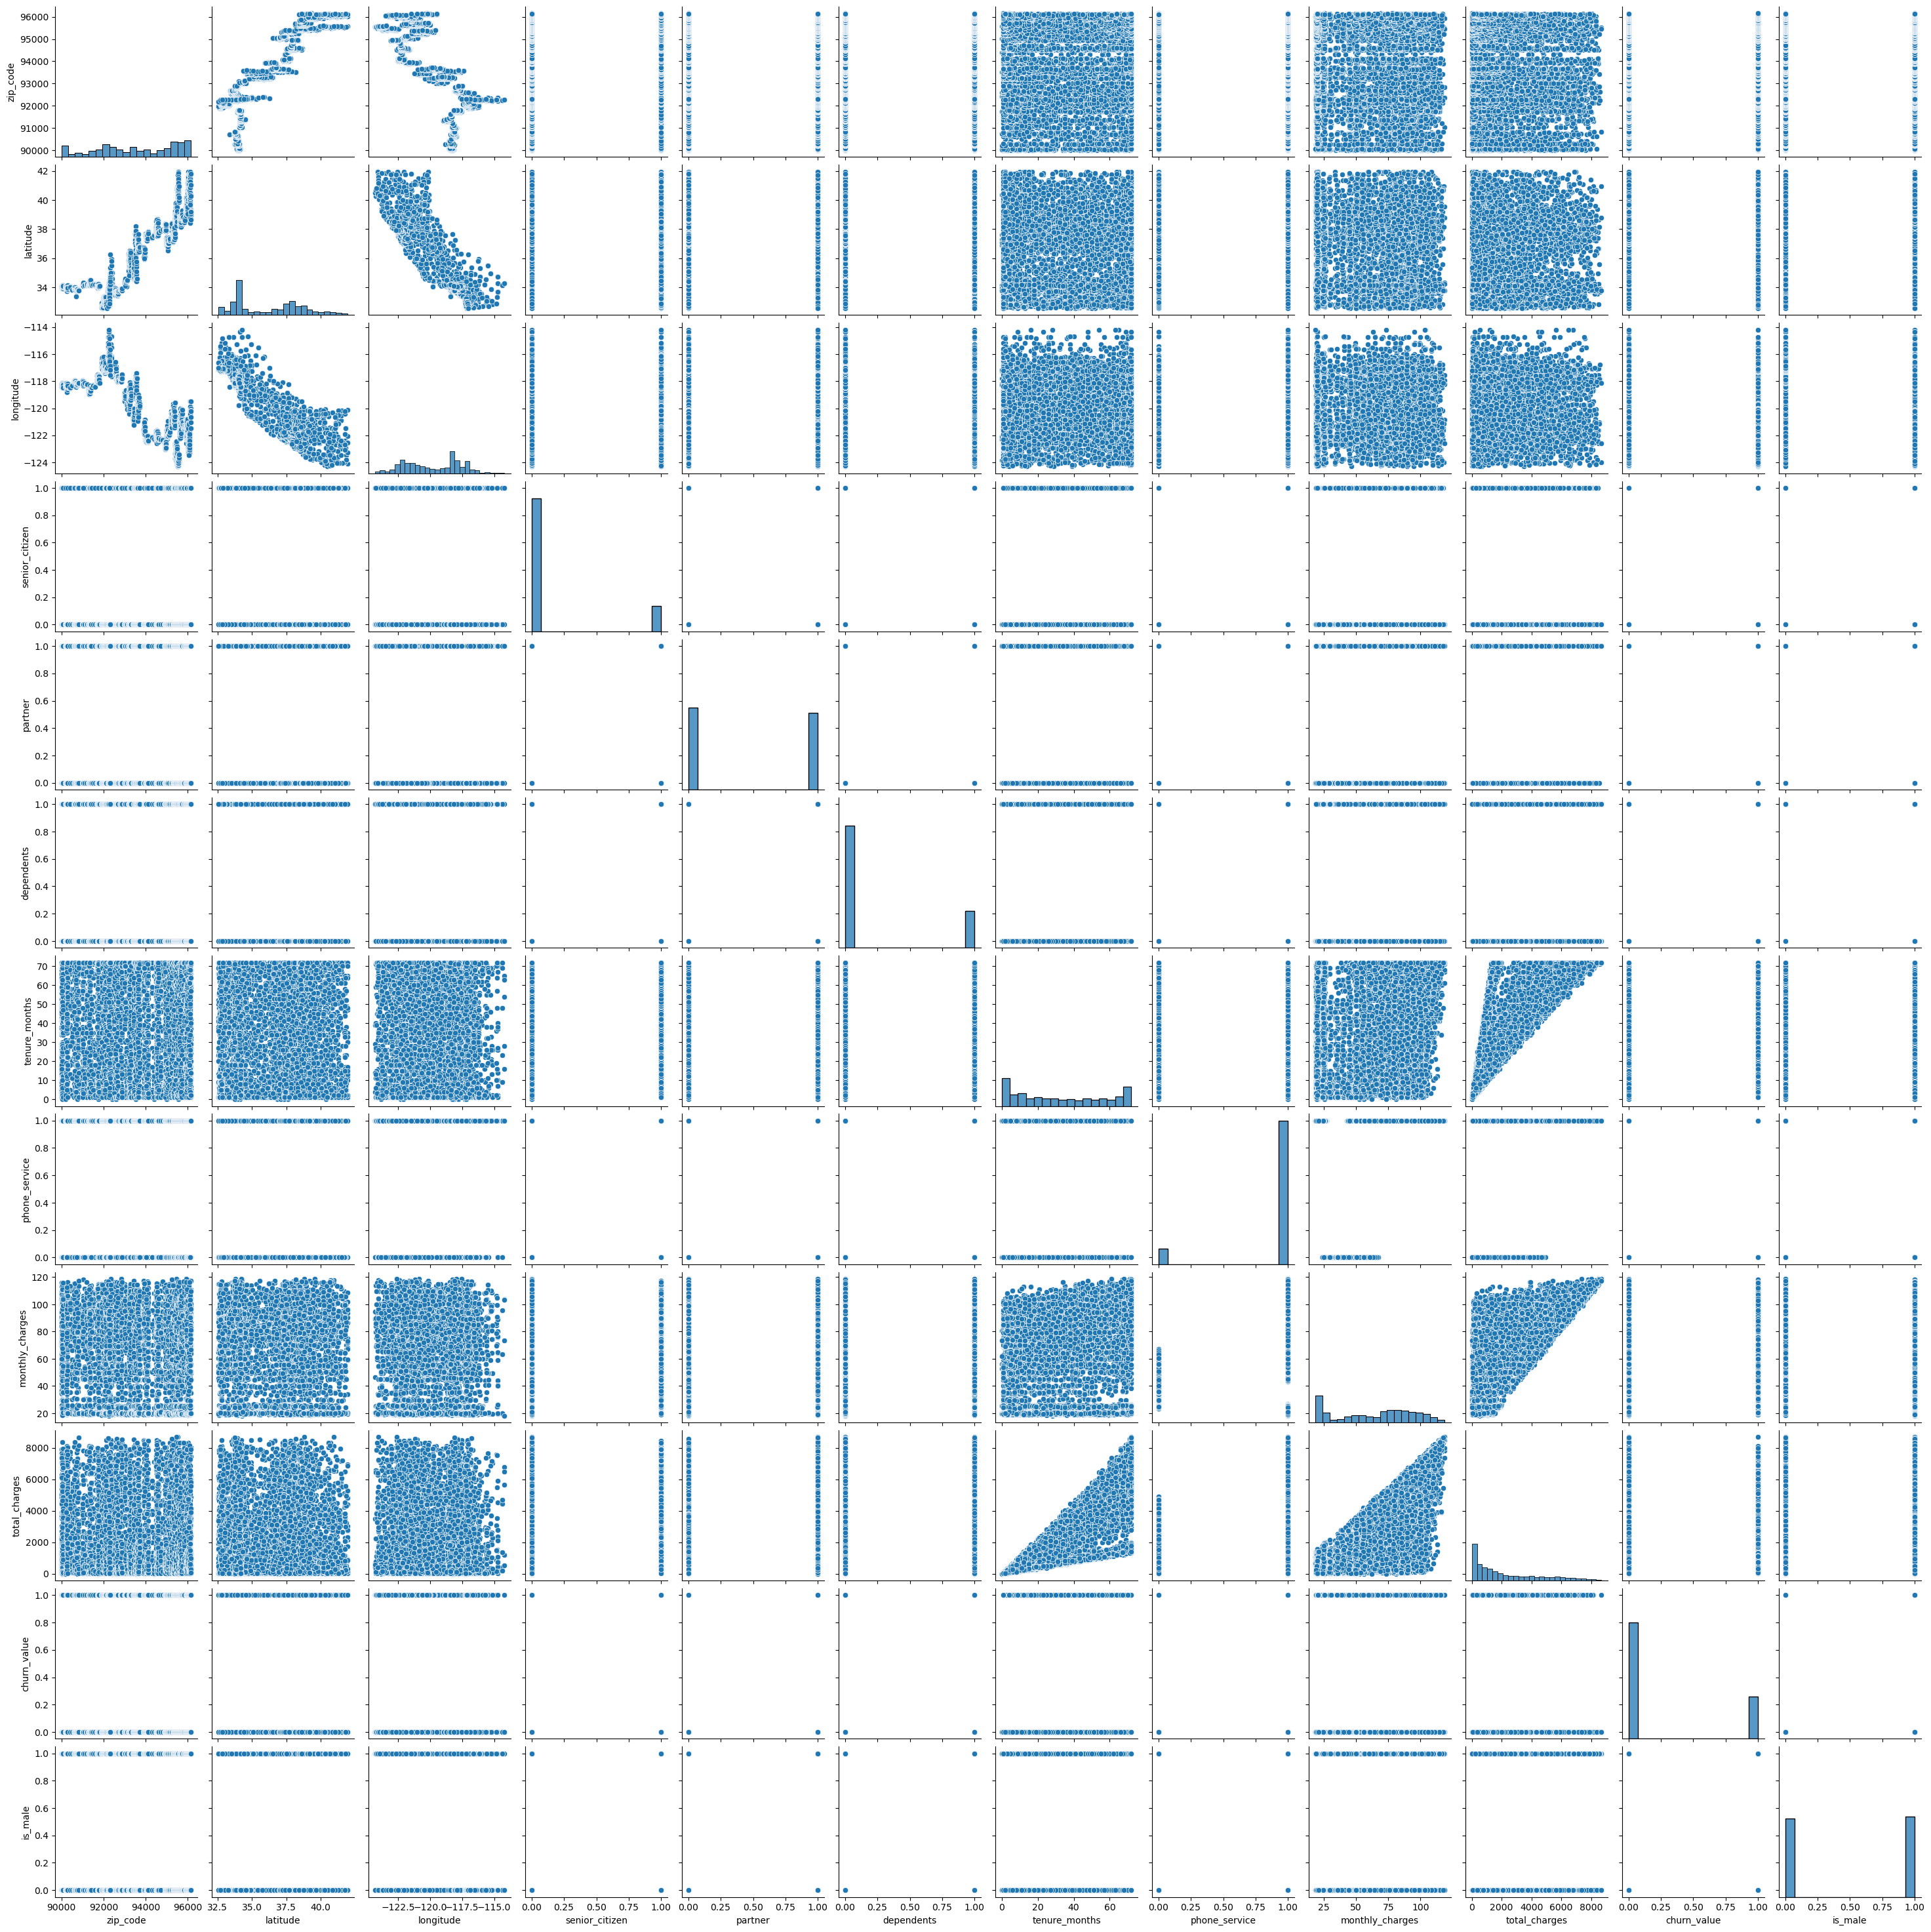

In [117]:
sns.pairplot(cleannumericdf)

In [83]:
cleandf.shap

(7043, 26)

In [84]:
raw_data.shape

(7043, 31)

In [120]:
cleandf['zip_code'].astype(str).str[:3].nunique()

57

In [121]:
cleandf['city'].nunique()

1129